В этом файле будет предобработка данных из двух датасетов для подготовки к обучению регрессионной модели.

In [ ]:
import pandas as pd
import numpy as np
# Импорт библиотек

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving enhanced_anxiety_dataset.csv to enhanced_anxiety_dataset.csv


In [ ]:
Big_stress_data=pd.read_csv("enhanced_anxiety_dataset.csv")

Это базовые данные, которые я не буду менять


In [ ]:
Big_stress_data.shape

(11000, 19)

In [ ]:
Big_stress_data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


Processed_Big_stress_data - Данные из первого датасета, которые я буду обрабатывать

In [ ]:
Processed_Big_stress_data=Big_stress_data


Теперь нужно посмотреть на .info(), .describe(), а также на характер наших данных:
Корреляция, распределение, p-value.

In [ ]:
Processed_Big_stress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

Выходит, в наших данных нет ни одного пропуска.

In [ ]:
Processed_Big_stress_data.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


Мне стало интересно, насколько больше пьют с возрастом

In [ ]:
import seaborn as sns
#библиотека для графиков

Анализ Данных

<Axes: xlabel='Age', ylabel='Alcohol Consumption (drinks/week)'>

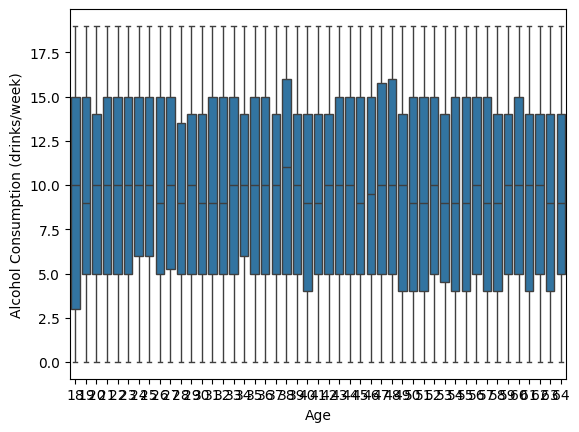

In [ ]:
sns.boxplot(data=Processed_Big_stress_data,x=Processed_Big_stress_data.Age,y=Processed_Big_stress_data["Alcohol Consumption (drinks/week)"])

10.0


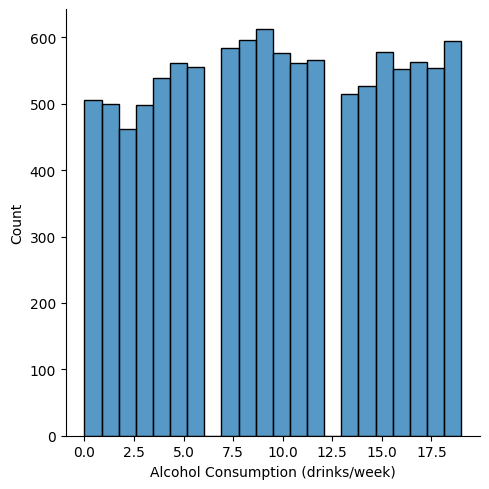

In [ ]:
print(Processed_Big_stress_data['Alcohol Consumption (drinks/week)'].median())
sns.displot(data=Processed_Big_stress_data,x=Processed_Big_stress_data['Alcohol Consumption (drinks/week)'])

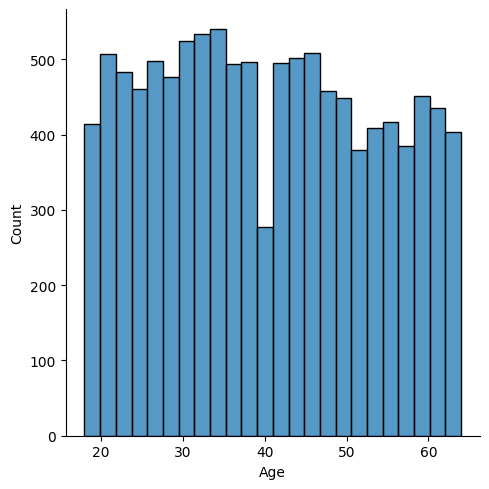

In [ ]:
sns.displot(data=Processed_Big_stress_data,x=Processed_Big_stress_data.Age)

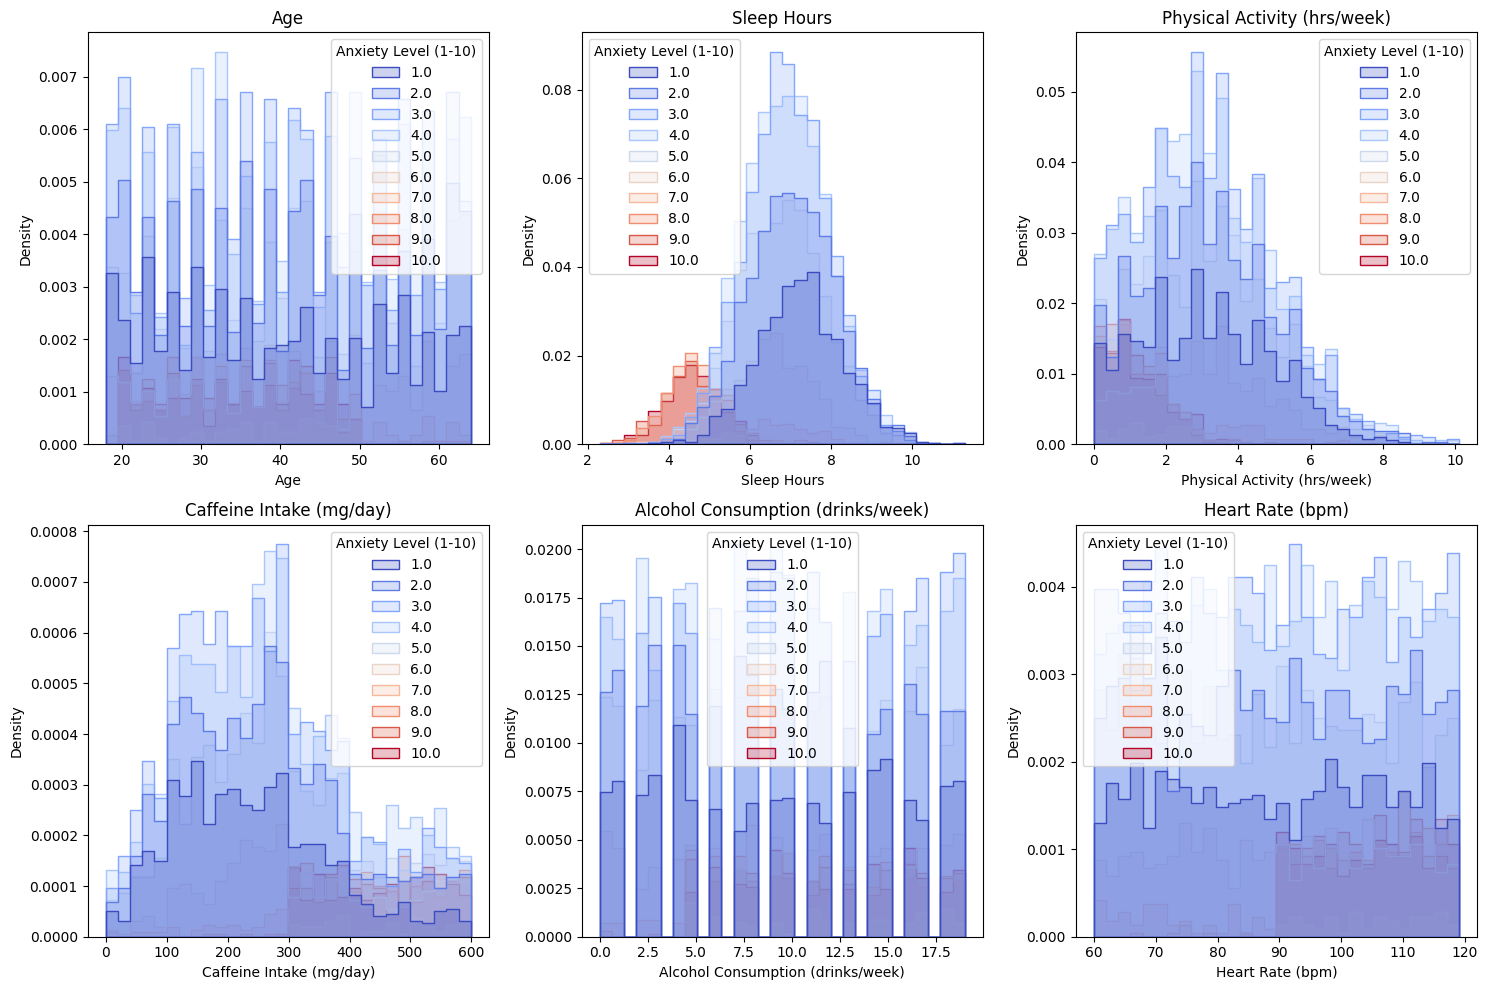

In [ ]:
import matplotlib.pyplot as plt

num_cols = [
    'Age','Sleep Hours','Physical Activity (hrs/week)',
    'Caffeine Intake (mg/day)','Alcohol Consumption (drinks/week)',
    'Heart Rate (bpm)','Breathing Rate (breaths/min)',
    'Sweating Level (1-5)','Therapy Sessions (per month)',
    'Diet Quality (1-10)'
]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:6]):  # первые 6 для примера
    plt.subplot(2,3,i+1)
    sns.histplot(
        data=Big_stress_data, x=col, hue='Anxiety Level (1-10)',
        bins=30, palette='coolwarm', element='step', stat='density'
    )
    plt.title(col)
plt.tight_layout()
plt.show()

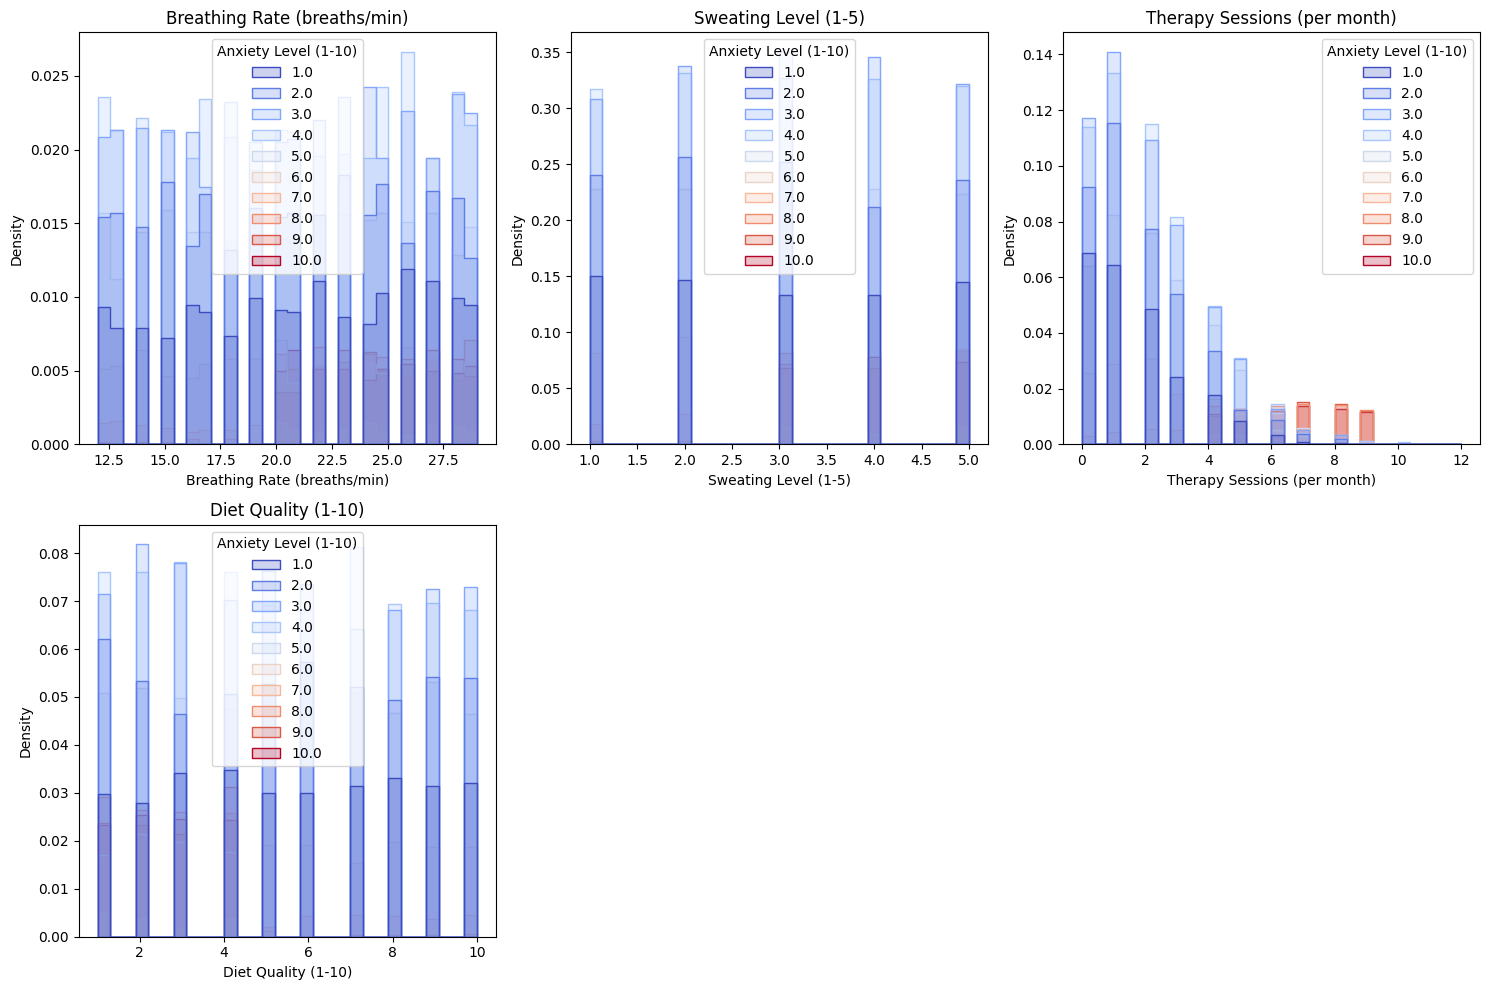

In [ ]:
num_cols = ['Breathing Rate (breaths/min)',
    'Sweating Level (1-5)','Therapy Sessions (per month)',
    'Diet Quality (1-10)'
]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:6]):  # первые 6 для примера
    plt.subplot(2,3,i+1)
    sns.histplot(
        data=Big_stress_data, x=col, hue='Anxiety Level (1-10)',
        bins=30, palette='coolwarm', element='step', stat='density'
    )
    plt.title(col)
plt.tight_layout()
plt.show()

Сделаю сразу БейзЛайн.
Для этого нужно предобработать данные в формат для случайного леса.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X=Processed_Big_stress_data.drop(['Anxiety Level (1-10)','Stress Level (1-10)'],axis=1)
#y=Big_stress_data['Stress Level (1-10)']
y=Big_stress_data['Anxiety Level (1-10)']

In [ ]:
#Удалим пока Occupation
X=X.drop(['Occupation'],axis=1)

Конвертация "String to Float"

In [ ]:
X['Gender']=X['Gender'].replace({'Male':1,'Female':0,'Other':0.5})
X=X.rename(columns={'Gender':'Sex_male'})

/tmp/ipython-input-3247953424.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Gender']=X['Gender'].replace({'Male':1,'Female':0,'Other':0.5})


In [ ]:
X['Smoking']=X['Smoking'].replace({'Yes':1,'No':0})
X=X.rename(columns={'Smoking':'Smoking_True'})

/tmp/ipython-input-2898982337.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Smoking']=X['Smoking'].replace({'Yes':1,'No':0})


In [ ]:
X['Family History of Anxiety']=X['Family History of Anxiety'].replace({'Yes':1,'No':0})
X['Dizziness']=X['Dizziness'].replace({'Yes':1,'No':0})
X['Medication']=X['Medication'].replace({'Yes':1,'No':0})
X['Recent Major Life Event']=X['Recent Major Life Event'].replace({'Yes':1,'No':0})
X=X.rename(columns={'Family History of Anxiety':'Family History of Anxiety_True','Dizziness':'Dizziness_True','Medication':'Medication_True','Recent Major Life Event':'Life_Event_True'})

/tmp/ipython-input-3638185913.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Family History of Anxiety']=X['Family History of Anxiety'].replace({'Yes':1,'No':0})
/tmp/ipython-input-3638185913.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Dizziness']=X['Dizziness'].replace({'Yes':1,'No':0})
/tmp/ipython-input-3638185913.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

Теперь наши данные только числового формата.

In [ ]:
X.head()

,Age,Sex_male,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking_True,Family History of Anxiety_True,Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness_True,Medication_True,Therapy Sessions (per month),Life_Event_True,Diet Quality (1-10)
0,29,0.0,6.0,2.7,181,10,1,0,114,14,4,0,1,3,1,7
1,46,0.5,6.2,5.7,200,8,1,1,62,23,2,1,0,2,0,8
2,64,1.0,5.0,3.7,117,4,0,1,91,28,3,0,0,1,1,1
3,20,0.0,5.8,2.8,360,6,1,0,86,17,3,0,0,0,0,1
4,49,0.0,8.2,2.3,247,4,1,0,98,19,4,1,1,1,0,3


In [ ]:
y.head()

,Anxiety Level (1-10)
0,5.0
1,3.0
2,1.0
3,2.0
4,1.0


Подготовка к обучению

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% данных пойдут в тест
    random_state=42,    # для воспроизводимости
    shuffle=True        # перемешать данные перед разбиением
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_regr=RandomForestRegressor(random_state=42 )

In [ ]:
param_dist = {
    'n_estimators': np.arange(50,61,10),
    'max_depth': np.arange(2,10,2),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(
    rf_regr,
    param_distributions=param_dist,
    n_iter=40,          # количество случайных комбинаций
    #scoring='neg_mean_squared_error',
    cv=5,               # кросс-валидация
    n_jobs=-1,
    #verbose=3,
    random_state=42,
    #return_train_score=True
)

In [ ]:
rand_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': array([2, 4, 6, 8]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([50, 60])},
                   random_state=42)

In [ ]:
My_best_params=rand_search.best_params_
My_best_params

{'n_estimators': np.int64(50),
 'min_samples_split': np.int64(3),
 'min_samples_leaf': np.int64(1),
 'max_depth': np.int64(8)}

In [ ]:
BaseLine_BestModel=rand_search.best_estimator_

In [ ]:
Y_predict=BaseLine_BestModel.predict(X_test)

In [ ]:
X_test.shape

(2200, 16)

In [ ]:
n = X_test.shape[0]   # число наблюдений
p = X_test.shape[1]
r2_score(y_test, Y_predict)
adj_r2_score = 1 - (1 - r2_score(y_test, Y_predict)) * (n - 1) / (n - p - 1)

In [ ]:
print(mean_absolute_error(y_test, Y_predict))
print(mean_squared_error(y_test, Y_predict))
print(np.sqrt(mean_squared_error(y_test, Y_predict)))
print(r2_score(y_test, Y_predict))
print(adj_r2_score)

1.1194908820284932
1.8567608198385113
1.3626301111594854
0.5992901072288392
0.596353158862216
